In [1]:
import pandas as pd
import numpy as np

In [5]:
survey = pd.read_excel('/content/Sample Survey.xlsx',sheet_name='Data')
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [6]:
survey['collection_date']

0      2020-08-24
1      2020-08-24
2      2020-08-24
3      2020-08-24
4      2020-08-24
          ...    
6862   2020-09-01
6863   2020-09-01
6864   2020-09-01
6865   2020-09-01
6866   2020-09-01
Name: collection_date, Length: 6867, dtype: datetime64[ns]

In [8]:
# 2 -- > How many samples were collected on each day?

import pandas as pd

# Assuming 'df' is your DataFrame and 'date_column' is the column containing dates
date_counts = survey['collection_date'].value_counts()
print(date_counts)


2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64


In [9]:
# 3 ->  What proportion of the total respondents were aged less than 45?

In [11]:
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, '24ko', 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67,
       65, 71, 63, 64, 68, 69, 99, 72, 75, 76], dtype=object)

In [14]:
survey['age'] = survey['age'].replace('24ko', np.nan)

In [15]:
survey['age'].unique()

array([26., 34., 25., 36., 22., 38., 23., 42., 51., 29., 24., 30., 39.,
       37., 19., 44., 53., 32., 21., 18., 20., 27., 48., 28., 45., 74.,
       35., 31., 70., 40., 49., 46., 43., 41., 33., 58., nan, 56., 50.,
       55., 54., 62., 60., 59., 47., 61., 52., 66., 57., 67., 65., 71.,
       63., 64., 68., 69., 99., 72., 75., 76.])

In [18]:
ans=survey['age'].median()
ans

27.0

In [26]:
survey['age'].fillna(ans,inplace=True)

In [27]:
survey['age'].value_counts(ascending=True)

76.0      1
72.0      1
99.0      1
74.0      1
69.0      1
75.0      1
71.0      2
70.0      3
66.0      4
63.0      4
68.0      4
65.0      5
62.0      5
59.0      5
67.0      7
64.0      8
58.0      9
56.0      9
57.0     10
54.0     11
61.0     12
53.0     12
60.0     15
55.0     20
51.0     23
52.0     24
49.0     27
46.0     32
47.0     34
48.0     35
41.0     54
44.0     54
50.0     60
39.0     69
43.0     72
45.0     82
37.0     90
42.0    104
18.0    125
36.0    127
38.0    135
33.0    143
31.0    159
19.0    171
34.0    173
40.0    177
29.0    239
32.0    263
35.0    263
21.0    311
23.0    317
20.0    328
27.0    361
26.0    389
22.0    392
28.0    396
30.0    440
24.0    449
25.0    598
Name: age, dtype: int64

In [28]:
# 3 -> What proportion of the total respondents were aged less than 45?


total_count = len(survey['age'])
above_45_count = len(survey[survey['age'] > 45])

proportion_above_45 = above_45_count / total_count
print(proportion_above_45)


0.056210863550313094


In [29]:
survey['age'] = survey['age'].astype(int)

In [30]:
# 4 -> Create a new column in the dataframe “age_group”. This column should contain the age
# group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The
# dataframe should look like this after the column creation:

def age_group(age):
    if age <= 25:
        return '18-25'
    elif age > 25 and age <= 40:
        return '25-40'
    elif age > 40 and age <= 55:
        return '40-55'
    else:
        return '55+'


survey['age_group'] = survey['age'].apply(age_group)

In [31]:
# 5 ->  How many samples were collected for each age-group? Which age-group had the most samples?
sample_group = survey.groupby('age_group').size()

print(sample_group)

id_sample = sample_group.idxmax()

print("max is from group: ")
print(id_sample)

age_group
18-25    2691
25-40    3424
40-55     644
55+       108
dtype: int64
max is from group: 
25-40


In [32]:
# 6 ->What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?
print("Ans",len(survey[(survey['Past_Vote']=='RJD') & (survey['Vote_Now']=='RJD')])/len(survey))

Ans 0.1181010630551915


In [33]:
# 7 -> For each day of sample collection, determine the proportion of respondents who were
# fully satisfied with the performance of the CM. So if there were a total of 1000 samples
# on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
# would be 0.3

In [34]:
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight', 'age_group'],
      dtype='object')

In [38]:
data= survey[['collection_date','CM_satisfaction']]

In [39]:
data.head()

,collection_date,CM_satisfaction
0,2020-08-24,Fully Dissatisfied
1,2020-08-24,Somewhat Satisfied
2,2020-08-24,Fully Dissatisfied
3,2020-08-24,Fully Dissatisfied
4,2020-08-24,Fully Satisfied


In [ ]:
# 7 -> For each day of sample collection, determine the proportion of respondents who were
# fully satisfied with the performance of the CM. So if there were a total of 1000 samples
# on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
# would be 0.3

In [41]:

satisfaction_mapping = {
    'Fully Dissatisfied': 0,
    'Somewhat Satisfied': 0.5,
    'Fully Satisfied': 1
}

data = survey[['collection_date', 'CM_satisfaction']]

data['CM_satisfaction'] = data['CM_satisfaction'].map(satisfaction_mapping)

data['collection_date'] = pd.to_datetime(data['collection_date'])

data['collection_date'] = data['collection_date'].dt.date
df_grouped = data.groupby('collection_date').mean()
df_grouped.rename(columns={'CM_satisfaction': 'ProportionFullySatisfied'}, inplace=True)

print(df_grouped)


                 ProportionFullySatisfied
collection_date                          
2020-08-24                       0.307901
2020-08-25                       0.306636
2020-08-26                       0.310476
2020-08-27                       0.286856
2020-08-28                       0.302308
2020-08-29                       0.303002
2020-08-30                       0.318982
2020-08-31                       0.304348
2020-09-01                       0.330134


<ipython-input-41-b4cefed4c306>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CM_satisfaction'] = data['CM_satisfaction'].map(satisfaction_mapping)
<ipython-input-41-b4cefed4c306>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['collection_date'] = pd.to_datetime(data['collection_date'])
<ipython-input-41-b4cefed4c306>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [44]:
# 8 -> In a similar fashion create a day-wise proportion of respondents that opted fully
# dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
# proportions on the y-axis.


<ipython-input-43-103689ff2b25>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MLA_satisfaction'] = data['MLA_satisfaction'].map(satisfaction_mapping)
<ipython-input-43-103689ff2b25>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['collection_date'] = pd.to_datetime(data['collection_date'])
<ipython-input-43-103689ff2b25>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

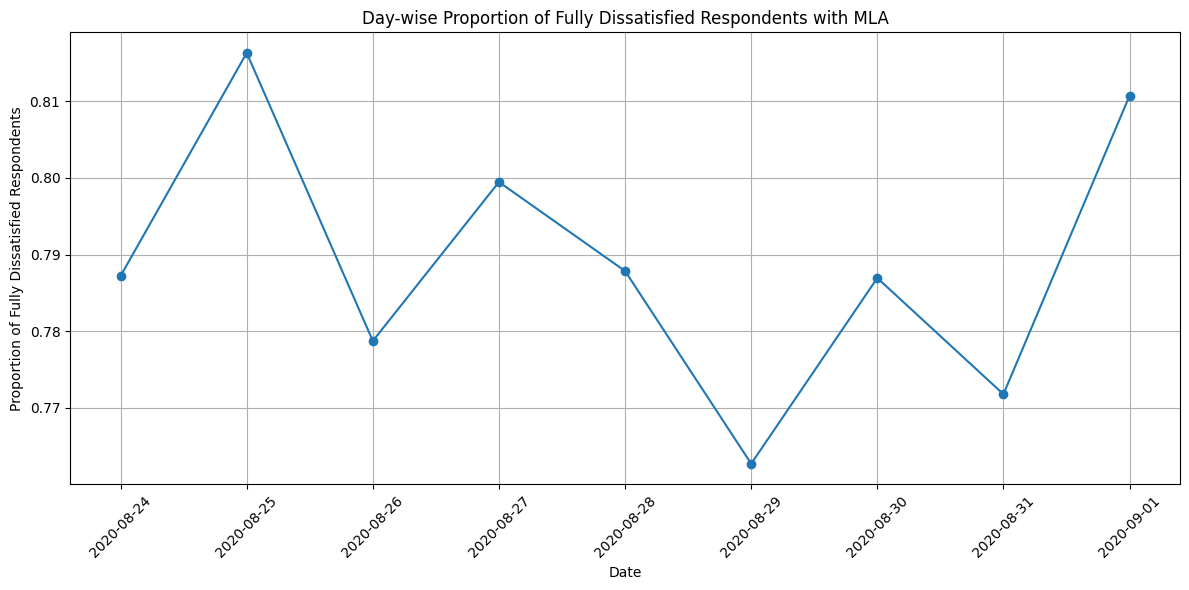

In [43]:
import matplotlib.pyplot as plt

satisfaction_mapping = {
    'Fully Dissatisfied': 1,
    'Somewhat Satisfied': 0.5,
    'Fully Satisfied': 0
}

data = survey[['collection_date', 'MLA_satisfaction']]

data['MLA_satisfaction'] = data['MLA_satisfaction'].map(satisfaction_mapping)

data['collection_date'] = pd.to_datetime(data['collection_date'])

data['collection_date'] = data['collection_date'].dt.date
df_grouped = data.groupby('collection_date').mean()
df_grouped.rename(columns={'MLA_satisfaction': 'ProportionFullyDissatisfied'}, inplace=True)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['ProportionFullyDissatisfied'], marker='o')
plt.xlabel('Date')
plt.ylabel('Proportion of Fully Dissatisfied Respondents')
plt.title('Day-wise Proportion of Fully Dissatisfied Respondents with MLA')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
